In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Data reading and basic cleaning

In [2]:
prof = pd.read_csv('prof.csv')

In [3]:
prof = prof.drop(1)

In [4]:
profFeatures = prof.drop(['Student Names',
                          'Number of correct answers',
                          'On average, how many movies you watch on a single week', 
                          'Which of the following movies you\'d say is your preferred?'], 
                         axis=1)

In [5]:
profFeatures

,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?"
0,10,2,5,6,7,1,3,1,3,3,9,4,5


In [6]:
d = pd.read_csv('clusters.csv')

In [7]:
d.head()

,Student Names,Total Score (0 - 100),Number of correct answers,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?
0,Camryn Pittman,0,0,7.0,9,8.0,10.0,10.0,7.0,9.0,3.0,6.0,7.0,10.0,10.0,10.0,2) One movie a week,Spiderman
1,Alivia Peters,0,0,3.0,1o,10.0,10.0,4.0,10.0,10.0,0.0,2.0,1.0,1.0,10.0,4.0,3) Two movies a week,"The Adams Family, Srek"
2,Aden Small,0,0,6.0,6,5.0,3.0,6.0,9.0,9.0,1.0,4.0,7.0,1.0,4.0,9.0,2) One movie a week,Srek
3,Kendal Cooper,0,0,10.0,10,8.0,9.0,6.0,8.0,10.0,8.0,9.0,7.0,8.0,4.0,10.0,3) Two movies a week,Spiderman
4,Emmett Esparza,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
d = d.drop(['Total Score (0 - 100)', 
            'Number of correct answers'], axis=1)

In [9]:
d = d.dropna()

In [10]:
d = d.applymap(lambda x: 10.0 if x == '1o' else x)

In [11]:
d = d.reset_index()

# Unsupervised clustering

_`d_un` is dataframe that contains numeric features only_

In [12]:
d_un = d.drop(['Which of the following movies you\'d say is your preferred?', 
            'On average, how many movies you watch on a single week', 
            'Student Names'], axis=1)

## Dendrogram

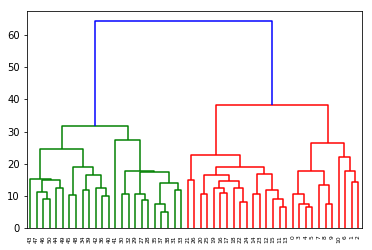

<Figure size 43200x21600 with 0 Axes>

In [13]:
clusters = linkage(d_un, method = 'complete')
dendrogram(clusters, leaf_rotation = 90)
plt.figure(figsize=(600,300))
plt.show()

## K-Means

In [14]:
d_un = d_un.append(profFeatures)
d_un = d_un.drop(['index'], axis=1)
d_un = d_un.reset_index()

dWithProf = d.append(prof.drop('Number of correct answers', axis=1))
dWithProf = dWithProf.reset_index()

d = d.drop('index', axis=1)

C:\Users\Dergel\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [15]:
model = KMeans(n_clusters=9)
model.fit(d_un)
dWithProf['Group'] = model.labels_

In [16]:
for i in range(len(model.labels_)):
    print(f"Student {dWithProf['Student Names'][i]} belongs to group {model.labels_[i]}") 

Student Camryn Pittman belongs to group 5
Student Alivia Peters belongs to group 0
Student Aden Small belongs to group 6
Student Kendal Cooper belongs to group 5
Student Linda Burch belongs to group 5
Student Carlo Velez belongs to group 5
Student Janessa Cameron belongs to group 0
Student Sanaa Hays belongs to group 6
Student Addisyn Aguilar belongs to group 5
Student Azul Contreras belongs to group 5
Student Larissa Frazier belongs to group 6
Student Jared Casey belongs to group 5
Student Emanuel Christian belongs to group 5
Student Yoselin Cole belongs to group 5
Student Roger Galvan belongs to group 5
Student Cedric Mosley belongs to group 5
Student Damion Oneill belongs to group 2
Student Salma Perry belongs to group 2
Student Brennan Wilkerson belongs to group 2
Student Dylan Lee belongs to group 2
Student Barrett Nguyen belongs to group 2
Student Alana Durham belongs to group 8
Student Emerson Briggs belongs to group 2
Student Abbie Buck belongs to group 8
Student Kai Pena belon

In [17]:
grouped_d = dWithProf.groupby('Group')

for key, item in grouped_d:
    print(f'Group {key}:')
    display(grouped_d.get_group(key).drop(['index', 'Group'], axis=1))
    print('====================================\n\n')

Group 0:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
1,1,3) Two movies a week,Alivia Peters,3,10,4,10,10,10,4,10,0,2,1,10,1,"The Adams Family, Srek"
6,6,4) Three to four movies a week,Janessa Cameron,10,10,0,7,10,0,0,10,0,7,0,10,0,Gladiator




Group 1:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
34,34,1) zero movies. I don't watch movies,Lillie Davenport,3,4,6,5,5,9,5,5,1,6,8,6,1,Star Wars
36,36,1) zero movies. I don't watch movies,Sanai Holland,5,7,2,9,2,3,7,6,3,5,7,8,6,Spiderman
39,39,2) One movie a week,Pierce Townsend,10,5,7,10,10,10,5,3,1,7,5,6,1,Spiderman
40,40,3) Two movies a week,Eddie Hurst,9,8,6,10,3,1,5,7,1,3,5,7,1,Spiderman
42,42,4) Three to four movies a week,Mary Avery,8,8,2,10,1,3,5,9,1,10,5,1,3,Srek
45,45,2) One movie a week,Micheal Hughes,5,7,9,10,7,3,8,6,6,6,7,4,1,Star Wars
48,48,2) One movie a week,Ryleigh Sawyer,5,2,10,8,6,6,8,4,1,3,7,1,3,Srek




Group 2:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
16,16,"4) Three to four movies a week, 3) Two movies ...",Damion Oneill,10,8,6,10,10,6,10,7,6,6,10,9,9,"Spiderman, Gladiator"
17,17,"2) One movie a week, 1) zero movies. I don't w...",Salma Perry,9,8,5,9,6,6,7,4,0,7,7,3,10,"Spiderman, Srek"
18,18,2) One movie a week,Brennan Wilkerson,1,5,8,10,6,8,5,1,6,9,6,6,8,Srek
19,19,1) zero movies. I don't watch movies,Dylan Lee,5,5,8,10,8,1,8,5,2,3,8,6,3,Srek
20,20,3) Two movies a week,Barrett Nguyen,3,10,9,8,3,8,8,9,0,9,9,9,0,Star Wars
22,22,"5) More than 4 movies a week, 3) Two movies a ...",Emerson Briggs,8,8,8,10,8,8,9,7,9,8,9,9,8,Gladiator
25,25,2) One movie a week,Wesley Goodman,7,9,9,7,3,8,8,5,2,6,7,9,6,Star Wars




Group 3:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
27,27,3) Two movies a week,Ishaan Rowe,10,8,6,10,9,10,8,10,10,5,9,10,5,Star Wars
28,28,1) zero movies. I don't watch movies,Maria Humphrey,10,10,10,10,10,10,10,10,10,10,10,10,10,Gladiator
29,29,2) One movie a week,Sarai Petty,8,6,10,10,6,7,8,9,5,8,10,6,8,Star Wars
32,32,3) Two movies a week,Isaac Shields,10,10,9,9,8,8,5,3,8,9,2,10,9,Spiderman
35,35,2) One movie a week,Aurora Miller,5,9,7,10,10,10,5,8,10,10,8,10,10,Star Wars
37,37,5) More than 4 movies a week,Alfredo Padilla,9,10,9,10,10,8,8,9,10,10,9,10,10,Star Wars
38,38,5) More than 4 movies a week,Desiree Brandt,9,8,7,10,9,8,7,10,10,9,10,7,9,The Adams Family




Group 4:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
43,43,1) zero movies. I don't watch movies,Landyn Hendrix,8,7,5,10,4,1,1,1,10,9,1,7,9,Spiderman
44,44,2) One movie a week,Haylee Thornton,7,8,5,3,7,8,6,7,9,8,1,5,4,Spiderman
46,46,2) One movie a week,Alexis Herring,8,10,5,7,8,5,6,5,7,9,7,6,8,"Spiderman, Gladiator, The Adams Family"
47,47,5) More than 4 movies a week,Justice Pham,8,8,10,9,10,2,2,10,10,7,5,10,10,Spiderman
49,49,2) One movie a week,Lindsey Glover,8,9,0,7,8,7,6,7,10,5,0,10,10,Star Wars
50,50,2) One movie a week,Jayvon Blair,5,6,6,5,8,7,5,6,9,9,6,10,9,The Adams Family




Group 5:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
0,0,2) One movie a week,Camryn Pittman,7,9,10,8,10,10,10,7,3,6,7,9,10,Spiderman
3,3,3) Two movies a week,Kendal Cooper,10,10,10,8,9,4,6,8,8,9,7,10,8,Spiderman
4,4,3) Two movies a week,Linda Burch,9,10,10,8,10,6,8,10,4,8,7,7,9,"Spiderman, The Adams Family, Star Wars"
5,5,2) One movie a week,Carlo Velez,8,8,8,8,8,8,8,8,8,8,8,8,8,Srek
8,8,2) One movie a week,Addisyn Aguilar,8,5,5,6,8,4,5,4,5,6,7,9,5,Star Wars
9,9,2) One movie a week,Azul Contreras,6,7,6,8,9,5,6,8,8,8,7,10,8,Star Wars
11,11,3) Two movies a week,Jared Casey,9,8,6,9,8,6,7,8,7,8,7,8,6,Star Wars
12,12,5) More than 4 movies a week,Emanuel Christian,6,7,10,9,10,8,9,6,4,10,0,10,8,Gladiator
13,13,4) Three to four movies a week,Yoselin Cole,10,10,10,8,9,4,6,8,8,9,7,10,8,Spiderman
14,14,1) zero movies. I don't watch movies,Roger Galvan,8,10,8,7,5,9,5,10,10,8,2,10,10,Spiderman




Group 6:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
2,2,2) One movie a week,Aden Small,6,6,9,5,3,4,6,9,1,4,7,9,1,Srek
7,7,"2) One movie a week, 1) zero movies. I don't w...",Sanaa Hays,3,8,5,6,3,9,1,6,2,6,2,8,5,Spiderman
10,10,4) Three to four movies a week,Larissa Frazier,3,5,8,9,0,0,2,6,0,2,0,8,2,"The Adams Family, Star Wars"
51,0,NaN,Professor,10,2,5,5,6,4,7,1,1,3,3,3,9,NaN




Group 7:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
41,41,3) Two movies a week,Jamie Huber,10,10,13,15,13,11,12,15,0,13,15,15,13,Star Wars




Group 8:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
21,21,3) Two movies a week,Alana Durham,9,6,6,5,10,1,1,1,1,10,1,9,10,Gladiator
23,23,2) One movie a week,Abbie Buck,9,9,7,7,5,6,3,9,7,9,1,9,9,Srek
24,24,4) Three to four movies a week,Kai Pena,7,8,7,7,6,4,5,7,9,8,7,6,9,Spiderman
26,26,2) One movie a week,Brogan Henry,7,6,2,6,5,4,5,4,4,6,5,7,2,"Spiderman, Star Wars"
30,30,4) Three to four movies a week,Tomas Bright,10,10,10,10,9,3,8,4,1,10,3,6,10,Spiderman
31,31,3) Two movies a week,Alberto Preston,10,8,2,8,10,3,5,9,5,9,6,10,7,"Spiderman, Gladiator"
33,33,4) Three to four movies a week,Abigayle Oliver,2,6,3,6,7,3,5,6,9,10,9,8,10,Star Wars


In [18]:
for key, item in grouped_d:
    print(f'Group {key}:')
    display(grouped_d.get_group(key).drop(['index', 'Group'], axis=1))
    print('====================================\n\n')

Group 0:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
1,1,3) Two movies a week,Alivia Peters,3,10,4,10,10,10,4,10,0,2,1,10,1,"The Adams Family, Srek"
6,6,4) Three to four movies a week,Janessa Cameron,10,10,0,7,10,0,0,10,0,7,0,10,0,Gladiator




Group 1:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
34,34,1) zero movies. I don't watch movies,Lillie Davenport,3,4,6,5,5,9,5,5,1,6,8,6,1,Star Wars
36,36,1) zero movies. I don't watch movies,Sanai Holland,5,7,2,9,2,3,7,6,3,5,7,8,6,Spiderman
39,39,2) One movie a week,Pierce Townsend,10,5,7,10,10,10,5,3,1,7,5,6,1,Spiderman
40,40,3) Two movies a week,Eddie Hurst,9,8,6,10,3,1,5,7,1,3,5,7,1,Spiderman
42,42,4) Three to four movies a week,Mary Avery,8,8,2,10,1,3,5,9,1,10,5,1,3,Srek
45,45,2) One movie a week,Micheal Hughes,5,7,9,10,7,3,8,6,6,6,7,4,1,Star Wars
48,48,2) One movie a week,Ryleigh Sawyer,5,2,10,8,6,6,8,4,1,3,7,1,3,Srek




Group 2:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
16,16,"4) Three to four movies a week, 3) Two movies ...",Damion Oneill,10,8,6,10,10,6,10,7,6,6,10,9,9,"Spiderman, Gladiator"
17,17,"2) One movie a week, 1) zero movies. I don't w...",Salma Perry,9,8,5,9,6,6,7,4,0,7,7,3,10,"Spiderman, Srek"
18,18,2) One movie a week,Brennan Wilkerson,1,5,8,10,6,8,5,1,6,9,6,6,8,Srek
19,19,1) zero movies. I don't watch movies,Dylan Lee,5,5,8,10,8,1,8,5,2,3,8,6,3,Srek
20,20,3) Two movies a week,Barrett Nguyen,3,10,9,8,3,8,8,9,0,9,9,9,0,Star Wars
22,22,"5) More than 4 movies a week, 3) Two movies a ...",Emerson Briggs,8,8,8,10,8,8,9,7,9,8,9,9,8,Gladiator
25,25,2) One movie a week,Wesley Goodman,7,9,9,7,3,8,8,5,2,6,7,9,6,Star Wars




Group 3:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
27,27,3) Two movies a week,Ishaan Rowe,10,8,6,10,9,10,8,10,10,5,9,10,5,Star Wars
28,28,1) zero movies. I don't watch movies,Maria Humphrey,10,10,10,10,10,10,10,10,10,10,10,10,10,Gladiator
29,29,2) One movie a week,Sarai Petty,8,6,10,10,6,7,8,9,5,8,10,6,8,Star Wars
32,32,3) Two movies a week,Isaac Shields,10,10,9,9,8,8,5,3,8,9,2,10,9,Spiderman
35,35,2) One movie a week,Aurora Miller,5,9,7,10,10,10,5,8,10,10,8,10,10,Star Wars
37,37,5) More than 4 movies a week,Alfredo Padilla,9,10,9,10,10,8,8,9,10,10,9,10,10,Star Wars
38,38,5) More than 4 movies a week,Desiree Brandt,9,8,7,10,9,8,7,10,10,9,10,7,9,The Adams Family




Group 4:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
43,43,1) zero movies. I don't watch movies,Landyn Hendrix,8,7,5,10,4,1,1,1,10,9,1,7,9,Spiderman
44,44,2) One movie a week,Haylee Thornton,7,8,5,3,7,8,6,7,9,8,1,5,4,Spiderman
46,46,2) One movie a week,Alexis Herring,8,10,5,7,8,5,6,5,7,9,7,6,8,"Spiderman, Gladiator, The Adams Family"
47,47,5) More than 4 movies a week,Justice Pham,8,8,10,9,10,2,2,10,10,7,5,10,10,Spiderman
49,49,2) One movie a week,Lindsey Glover,8,9,0,7,8,7,6,7,10,5,0,10,10,Star Wars
50,50,2) One movie a week,Jayvon Blair,5,6,6,5,8,7,5,6,9,9,6,10,9,The Adams Family




Group 5:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
0,0,2) One movie a week,Camryn Pittman,7,9,10,8,10,10,10,7,3,6,7,9,10,Spiderman
3,3,3) Two movies a week,Kendal Cooper,10,10,10,8,9,4,6,8,8,9,7,10,8,Spiderman
4,4,3) Two movies a week,Linda Burch,9,10,10,8,10,6,8,10,4,8,7,7,9,"Spiderman, The Adams Family, Star Wars"
5,5,2) One movie a week,Carlo Velez,8,8,8,8,8,8,8,8,8,8,8,8,8,Srek
8,8,2) One movie a week,Addisyn Aguilar,8,5,5,6,8,4,5,4,5,6,7,9,5,Star Wars
9,9,2) One movie a week,Azul Contreras,6,7,6,8,9,5,6,8,8,8,7,10,8,Star Wars
11,11,3) Two movies a week,Jared Casey,9,8,6,9,8,6,7,8,7,8,7,8,6,Star Wars
12,12,5) More than 4 movies a week,Emanuel Christian,6,7,10,9,10,8,9,6,4,10,0,10,8,Gladiator
13,13,4) Three to four movies a week,Yoselin Cole,10,10,10,8,9,4,6,8,8,9,7,10,8,Spiderman
14,14,1) zero movies. I don't watch movies,Roger Galvan,8,10,8,7,5,9,5,10,10,8,2,10,10,Spiderman




Group 6:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
2,2,2) One movie a week,Aden Small,6,6,9,5,3,4,6,9,1,4,7,9,1,Srek
7,7,"2) One movie a week, 1) zero movies. I don't w...",Sanaa Hays,3,8,5,6,3,9,1,6,2,6,2,8,5,Spiderman
10,10,4) Three to four movies a week,Larissa Frazier,3,5,8,9,0,0,2,6,0,2,0,8,2,"The Adams Family, Star Wars"
51,0,NaN,Professor,10,2,5,5,6,4,7,1,1,3,3,3,9,NaN




Group 7:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
41,41,3) Two movies a week,Jamie Huber,10,10,13,15,13,11,12,15,0,13,15,15,13,Star Wars




Group 8:


,level_0,"On average, how many movies you watch on a single week",Student Names,"Using a scale 1 to 10, how much do you like action movies?","Using a scale 1 to 10, how much do you like adventure movies?","Using a scale 1 to 10, how much do you like animated movies?","Using a scale 1 to 10, how much do you like comedy movies?","Using a scale 1 to 10, how much do you like crime movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like thriller movies?",Which of the following movies you'd say is your preferred?
21,21,3) Two movies a week,Alana Durham,9,6,6,5,10,1,1,1,1,10,1,9,10,Gladiator
23,23,2) One movie a week,Abbie Buck,9,9,7,7,5,6,3,9,7,9,1,9,9,Srek
24,24,4) Three to four movies a week,Kai Pena,7,8,7,7,6,4,5,7,9,8,7,6,9,Spiderman
26,26,2) One movie a week,Brogan Henry,7,6,2,6,5,4,5,4,4,6,5,7,2,"Spiderman, Star Wars"
30,30,4) Three to four movies a week,Tomas Bright,10,10,10,10,9,3,8,4,1,10,3,6,10,Spiderman
31,31,3) Two movies a week,Alberto Preston,10,8,2,8,10,3,5,9,5,9,6,10,7,"Spiderman, Gladiator"
33,33,4) Three to four movies a week,Abigayle Oliver,2,6,3,6,7,3,5,6,9,10,9,8,10,Star Wars


In [19]:
for key, item in grouped_d:
    print(f'Group {key}:')
    display(grouped_d.get_group(key)['Student Names'])
    print('====================================\n\n')

Group 0:


1      Alivia Peters
6    Janessa Cameron
Name: Student Names, dtype: object



Group 1:


34    Lillie Davenport
36       Sanai Holland
39     Pierce Townsend
40         Eddie Hurst
42          Mary Avery
45      Micheal Hughes
48      Ryleigh Sawyer
Name: Student Names, dtype: object



Group 2:


16        Damion Oneill
17          Salma Perry
18    Brennan Wilkerson
19            Dylan Lee
20       Barrett Nguyen
22       Emerson Briggs
25       Wesley Goodman
Name: Student Names, dtype: object



Group 3:


27        Ishaan Rowe
28     Maria Humphrey
29        Sarai Petty
32      Isaac Shields
35      Aurora Miller
37    Alfredo Padilla
38     Desiree Brandt
Name: Student Names, dtype: object



Group 4:


43     Landyn Hendrix
44    Haylee Thornton
46     Alexis Herring
47       Justice Pham
49     Lindsey Glover
50       Jayvon Blair
Name: Student Names, dtype: object



Group 5:


0        Camryn Pittman
3         Kendal Cooper
4           Linda Burch
5           Carlo Velez
8       Addisyn Aguilar
9        Azul Contreras
11          Jared Casey
12    Emanuel Christian
13         Yoselin Cole
14         Roger Galvan
15        Cedric Mosley
Name: Student Names, dtype: object



Group 6:


2          Aden Small
7          Sanaa Hays
10    Larissa Frazier
51          Professor
Name: Student Names, dtype: object



Group 7:


41    Jamie Huber
Name: Student Names, dtype: object



Group 8:


21       Alana Durham
23         Abbie Buck
24           Kai Pena
26       Brogan Henry
30       Tomas Bright
31    Alberto Preston
33    Abigayle Oliver
Name: Student Names, dtype: object

==============================================
=======================

# Supervised clustering

## Split data

In [20]:
anotherLabelsColumn = 'Which of the following movies you\'d say is your preferred?'
labelsColumn = 'On average, how many movies you watch on a single week'

# https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

# we multiply rows when we see that it has values in labels column that should be splitted
# for example, if we see `Spiderman, Srek`, we add two rows
dExploded = pd.concat([pd.concat([pd.DataFrame(row[row.index != labelsColumn].values)] 
                                 * len(row[labelsColumn].split(', ')), axis=1).transpose()              
                    for _, row in d.drop(anotherLabelsColumn, axis=1).iterrows()]).reset_index()

dExploded = dExploded.drop('index', axis=1)
dExploded.columns = d.columns.drop([anotherLabelsColumn, labelsColumn])

# and then we add splitted values to multiplied dataframe
dExploded[labelsColumn] = [item for sublist in [x.split(', ') for x in d[labelsColumn]] for item in sublist]

In [21]:
dExploded = dExploded.drop('Student Names', axis=1)

In [22]:
features = dExploded.drop([labelsColumn], axis = 1).values
target = dExploded[labelsColumn].values

In [23]:
pd.Series(target).value_counts()

2) One movie a week                     20
3) Two movies a week                    15
4) Three to four movies a week           9
1) zero movies. I don't watch movies     8
5) More than 4 movies a week             5
dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

## k-NN

In [25]:
grid = {'n_neighbors' : np.arange(1, 25)}

In [26]:
knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 

knn = GridSearchCV(knn_classifier, grid, cv = 10)

knn.fit(X_train, y_train)

#Extracting the optimal number of neighbors 

print(knn.best_params_)

#Extracting the accuracy score for optimal number of neighbors

print(knn.best_score_)

C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 9}
0.41025641025641024


C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=knn.best_params_['n_neighbors'])
knn_classifier.fit(X_train, y_train)
knn_classifier.predict(profFeatures)

array(['2) One movie a week'], dtype=object)

## SVM

In [28]:
svm = LinearSVC(random_state = 50)

gridSVM = GridSearchCV(svm, {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 10]})
gridSVM.fit(X_train, y_train)

print(gridSVM.score(X_test, y_test))

print(gridSVM.predict(profFeatures))

0.3333333333333333
['2) One movie a week']


C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the

## Naive Bayess

In [29]:
#Initializing an NB classifier

nb_classifier = GaussianNB()

#Fitting the classifier into the training data

nb_classifier.fit(X_train, y_train)

#Extracting the accuracy score from the NB classifier

print(nb_classifier.score(X_test, y_test))

nb_classifier.predict(profFeatures)

0.16666666666666666


array(["1) zero movies. I don't watch movies"], dtype='<U36')

## Tree

In [30]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

#Creating a grid of different hyperparameters

grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}

#Building a 10 fold Cross Validated GridSearchCV object

gridTree = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

#Fitting the grid to the training data

gridTree.fit(X_train, y_train)

#Extracting the best parameters

print(gridTree.best_params_)

#Extracting the best score

print(gridTree.best_score_)

gridTree.predict(profFeatures)

C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 4, 'min_samples_leaf': 0.04}
0.358974358974359


C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array(['3) Two movies a week'], dtype=object)

## Forest


In [31]:
#Initializing the DT classifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

#Fitting on the training data

dt.fit(X_train, y_train)

#Initiliazing an Random Forest Classifier with default parameters

rf_classifier = RandomForestClassifier(random_state = 50)

#Fitting the classifier on the training data

rf_classifier.fit(X_train, y_train)

rf_classifier.score(X_test, y_test)

rf_classifier.predict(profFeatures)

C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(["1) zero movies. I don't watch movies"], dtype=object)

# Voting Classifier

In [32]:
models = [
    ('Decision Tree', gridTree), 
#     ('Random Forest', rf_classifier), 
#     ('Nayive Bayess', nb_classifier), 
    ('SVM', gridSVM), 
    ('kNN', knn_classifier)]

In [33]:
voting_model = VotingClassifier(estimators = models)
voting_model.fit(X_train, y_train)

print(voting_model.score(X_test, y_test))

print(voting_model.predict(profFeatures))

C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the nu

0.3333333333333333
['2) One movie a week']


C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Results:

In [34]:
print('k-NN')
print(knn.best_score_)
print(knn_classifier.predict(profFeatures))
print()

print('SVM')
print(gridSVM.score(X_test, y_test))
print(gridSVM.predict(profFeatures))
print()

print('Naive Bayess')
print(nb_classifier.score(X_test, y_test))
print(nb_classifier.predict(profFeatures))
print()

print('Decision Tree')
print(gridTree.best_score_)
print(gridTree.predict(profFeatures))
print()

print('Random Forest')
print(rf_classifier.score(X_test, y_test))
print(rf_classifier.predict(profFeatures))
print()

print('Voting Classifier, based on')
print([x[0] for x in models])
print(voting_model.score(X_test, y_test))
print(voting_model.predict(profFeatures))

k-NN
0.41025641025641024
['2) One movie a week']

SVM
0.3333333333333333
['2) One movie a week']

Naive Bayess
0.16666666666666666
["1) zero movies. I don't watch movies"]

Decision Tree
0.358974358974359
['3) Two movies a week']

Random Forest
0.16666666666666666
["1) zero movies. I don't watch movies"]

Voting Classifier, based on
['Decision Tree', 'SVM', 'kNN']
0.3333333333333333
['2) One movie a week']
